<a href="https://colab.research.google.com/github/emma-ellsworth/DS1002-gbp4bh/blob/main/labs/lab1/lab1-ftx-stock-pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
#Completed independently

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [82]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv", sep = ";")

## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [83]:
df.shape

(741, 11)

## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [87]:
df.drop_duplicates(inplace=True)

cleandata = df.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'], axis = 1)

cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 739
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       727 non-null    float64
 1   high       727 non-null    float64
 2   low        727 non-null    float64
 3   close      727 non-null    float64
 4   volume     727 non-null    float64
 5   timestamp  727 non-null    object 
dtypes: float64(5), object(1)
memory usage: 39.8+ KB


Now display the first 10 rows of the cleaned dataset.

In [50]:
cleandata.head(10)

,open,high,low,close,volume,timestamp
0,0.838968,0.853502,0.835226,0.842688,3001502.06,2022-12-31T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z
5,0.894567,1.011183,0.893652,0.930696,7065306.21,2022-12-26T23:59:59.999Z
6,0.924432,0.935517,0.894370,0.894657,2577834.83,2022-12-25T23:59:59.999Z
7,0.957505,0.975671,0.921085,0.924433,5055004.16,2022-12-24T23:59:59.999Z
8,1.027133,1.038282,0.948058,0.957006,17088962.94,2022-12-23T23:59:59.999Z
9,0.873973,1.127198,0.835625,1.027162,22418556.51,2022-12-22T23:59:59.999Z


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [62]:
cleandata["close_change"] = cleandata['close'].diff()

## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [63]:
toptendays = cleandata.sort_values(["close_change"], ascending = False)
toptendays = toptendays.drop(["open", "high", "low", "close", "volume", "timestamp"], axis = 1)
toptendays["Date"] = df['timestamp']
toptendays.head(10)

,close_change,Date
56,16.623292,2022-11-07T23:59:59.999Z
468,14.497738,2021-09-16T23:59:59.999Z
598,14.017812,2021-05-18T23:59:59.999Z
478,9.506381,2021-09-15T23:59:59.999Z
473,8.315742,2021-09-19T23:59:59.999Z
484,6.929033,2021-09-09T23:59:59.999Z
350,6.770635,2022-01-20T23:59:59.999Z
594,6.228516,2021-05-22T23:59:59.999Z
481,5.201864,2021-09-12T23:59:59.999Z
605,5.154806,2021-05-11T23:59:59.999Z


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [64]:
cleandata["rate_of_change"] = cleandata['close'].pct_change()

## 7. Identify Greatest % Change Days (1 pt)

Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

In [66]:
topfivedays = cleandata.sort_values(["rate_of_change"], ascending = False)
topfivedays = topfivedays.drop(["open", "high", "low", "close", "volume", "timestamp", "close_change"], axis = 1)
topfivedays["Date"] = df['timestamp']
topfivedays.head(5)

,rate_of_change,Date
56,3.012064,2022-11-07T23:59:59.999Z
55,1.398869,2022-11-08T23:59:59.999Z
51,0.402640,2022-11-12T23:59:59.999Z
598,0.379502,2021-05-18T23:59:59.999Z
53,0.357670,2022-11-10T23:59:59.999Z


## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

Text(0, 0.5, 'Closing Price')

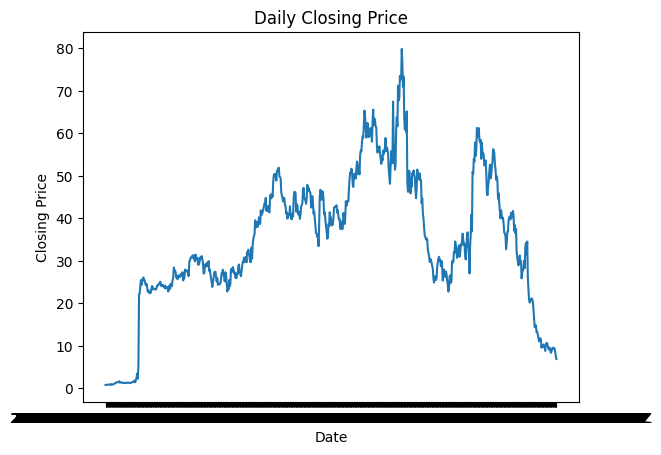

In [77]:
import matplotlib.pyplot as plt

plt.plot(cleandata["timestamp"], cleandata["close"])
plt.title('Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')

Text(0, 0.5, 'Gain/Loss')

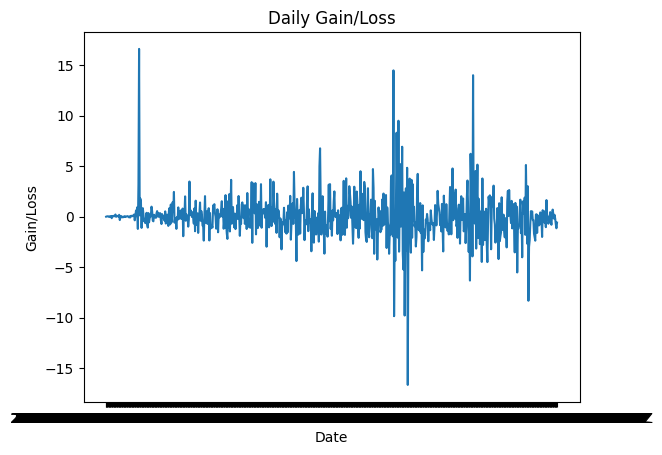

In [78]:
plt.plot(cleandata["timestamp"], cleandata["close_change"])
plt.title('Daily Gain/Loss')
plt.xlabel('Date')
plt.ylabel('Gain/Loss')

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

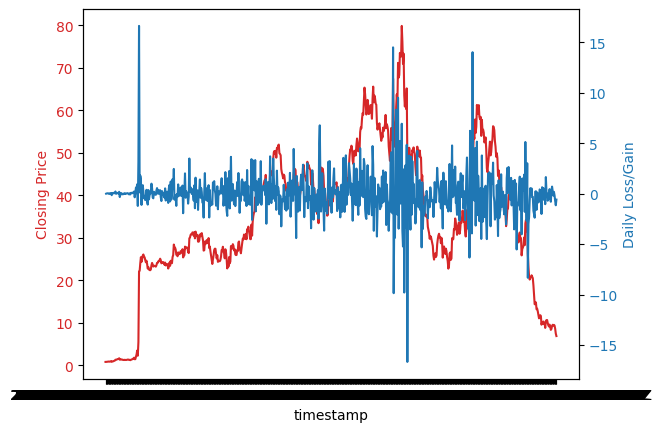

In [81]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('timestamp')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(cleandata["timestamp"], cleandata["close"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Daily Loss/Gain', color=color)
ax2.plot(cleandata["timestamp"], cleandata["close_change"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()
